# 1. Importing Libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import eda_helper_functions
from sklearn.ensemble import IsolationForest

# 2. Read the training data

In [7]:
file_path = r"C:\Users\DELL\Desktop\Programming\ml-project2-flight-price-prediction-using-aws-sagemaker\data\train.csv"

train = pd.read_csv(file_path)

In [8]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Air India,2019-05-15,Mumbai,Hyderabad,19:30:00,20:45:00,75,0.0,No Info,3100
1,Jet Airways,2019-06-27,Delhi,Cochin,13:25:00,19:00:00,1775,2.0,No Info,12819
2,Jet Airways,2019-06-03,Delhi,Cochin,21:25:00,19:00:00,1295,2.0,No Info,13292
3,Jet Airways,2019-04-01,Kolkata,Banglore,06:30:00,04:40:00,1330,1.0,In-Flight Meal Not Included,7064
4,Air India,2019-05-18,Kolkata,Banglore,16:50:00,13:45:00,1255,2.0,No Info,13432
...,...,...,...,...,...,...,...,...,...,...
6271,Jet Airways,2019-03-21,Delhi,Cochin,10:45:00,18:50:00,1925,2.0,No Info,11093
6272,Air India,2019-05-01,Kolkata,Banglore,09:25:00,18:30:00,545,1.0,No Info,8891
6273,Jet Airways,2019-06-01,Delhi,Cochin,14:00:00,19:00:00,300,1.0,In-Flight Meal Not Included,10262
6274,Air Asia,2019-06-24,Delhi,Cochin,07:55:00,13:25:00,330,1.0,No Info,6152


In [9]:
# checking the types

train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [10]:
# correcting  the dtypes of date_of_journey, dep_time, arrival_time

train = train.assign(**{
    col: pd.to_datetime(train.loc[:, col], dayfirst=True, format="mixed")
	for col in ["date_of_journey", "dep_time", "arrival_time"]
}
)

In [11]:
# again checking the dtype
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

# 3. High level summary of data

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          6276 non-null   object        
 1   date_of_journey  6276 non-null   datetime64[ns]
 2   source           6276 non-null   object        
 3   destination      6276 non-null   object        
 4   dep_time         6276 non-null   datetime64[ns]
 5   arrival_time     6276 non-null   datetime64[ns]
 6   duration         6276 non-null   int64         
 7   total_stops      6275 non-null   float64       
 8   additional_info  6276 non-null   object        
 9   price            6276 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 490.4+ KB


In [14]:
train.describe(include = "number")  # total steps is categrical (behavior)

,duration,total_stops,price
count,6276.000000,6275.000000,6276.000000
mean,633.123805,0.800159,9032.109783
std,503.633196,0.659571,4663.686031
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5200.500000
50%,505.000000,1.000000,8283.000000
75%,925.000000,1.000000,12373.000000
max,2860.000000,3.000000,62427.000000


In [34]:
(
    train
    # .assign(total_steps = train["total_steps"].astype(object))
    .describe(include = "O")
)

,airline,source,destination,additional_info
count,6276,6276,6276,6276
unique,9,5,6,7
top,Jet Airways,Delhi,Cochin,No Info
freq,2240,2565,2565,4928


# 4. high level analysis of missing values

In [35]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,
total_stops,1,0.015934


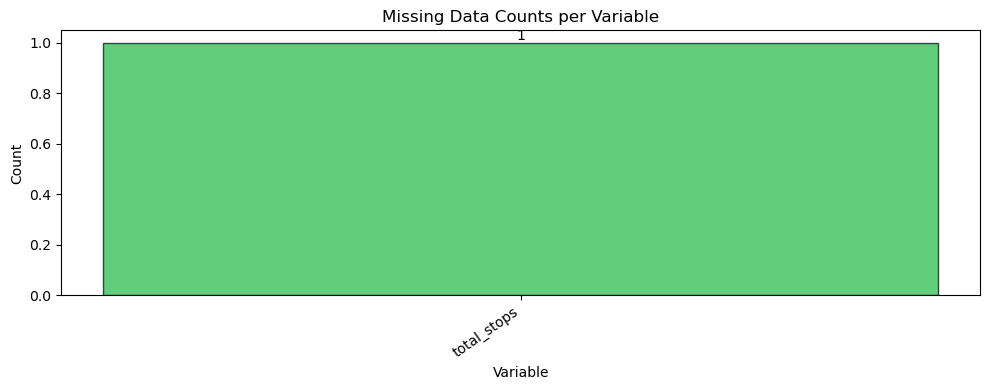

In [36]:
eda_helper_functions.plot_missing_info(train)

# 5. High level analysis of outliers

In [41]:
forest = IsolationForest(n_estimators = 10, random_state = 42)

In [44]:
(
    train
    .assign(outlier  = forest.fit_predict(train
                                          .drop(columns = "price")
                                          .select_dtypes(include = 'number')))
    .query('outlier == -1')
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Air India,2019-05-15,Mumbai,Hyderabad,2026-01-15 19:30:00,2026-01-15 20:45:00,75,0.0,No Info,3100,-1
1,Jet Airways,2019-06-27,Delhi,Cochin,2026-01-15 13:25:00,2026-01-15 19:00:00,1775,2.0,No Info,12819,-1
2,Jet Airways,2019-06-03,Delhi,Cochin,2026-01-15 21:25:00,2026-01-15 19:00:00,1295,2.0,No Info,13292,-1
4,Air India,2019-05-18,Kolkata,Banglore,2026-01-15 16:50:00,2026-01-15 13:45:00,1255,2.0,No Info,13432,-1
6,Air India,2019-06-09,Kolkata,Banglore,2026-01-15 16:50:00,2026-01-15 05:35:00,765,2.0,No Info,11642,-1
...,...,...,...,...,...,...,...,...,...,...,...
6268,Air India,2019-06-06,Kolkata,Banglore,2026-01-15 05:50:00,2026-01-15 08:55:00,1625,2.0,No Info,12723,-1
6269,Jet Airways,2019-06-15,Delhi,Cochin,2026-01-15 21:25:00,2026-01-15 12:35:00,910,2.0,In-Flight Meal Not Included,9905,-1
6270,Indigo,2019-03-03,Mumbai,Hyderabad,2026-01-15 09:10:00,2026-01-15 10:40:00,90,0.0,No Info,5755,-1
6271,Jet Airways,2019-03-21,Delhi,Cochin,2026-01-15 10:45:00,2026-01-15 18:50:00,1925,2.0,No Info,11093,-1


# 6. Pair plot

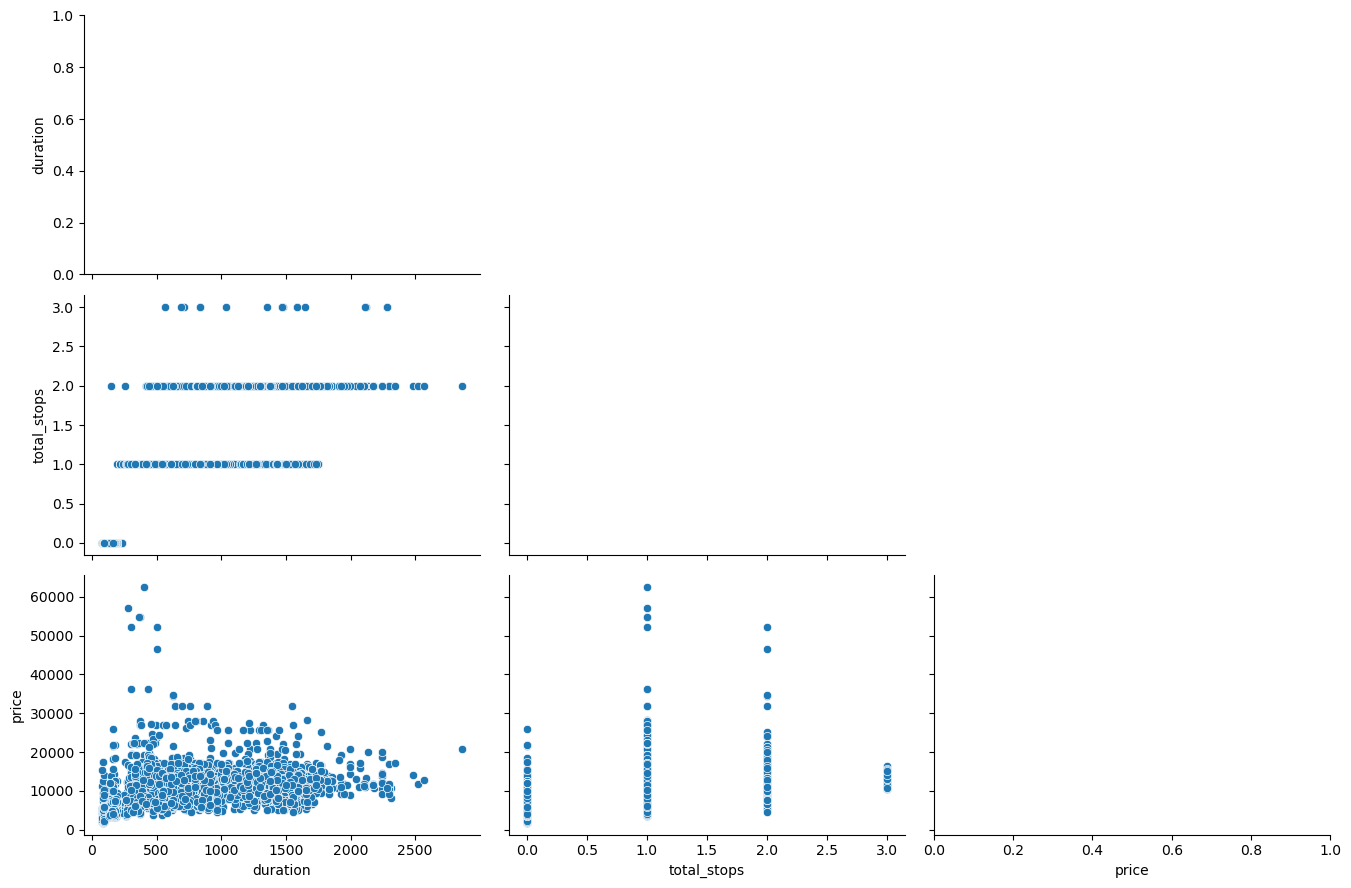

In [46]:
eda_helper_functions.pair_plots(train)

# 7. Correlation analysis

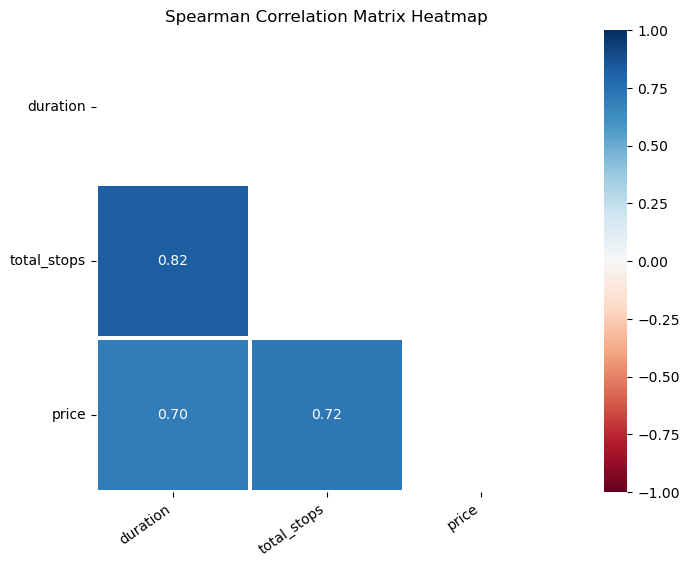

In [ ]:
# numerical feature analysis

eda_helper_functions.correlation_heatmap(train)

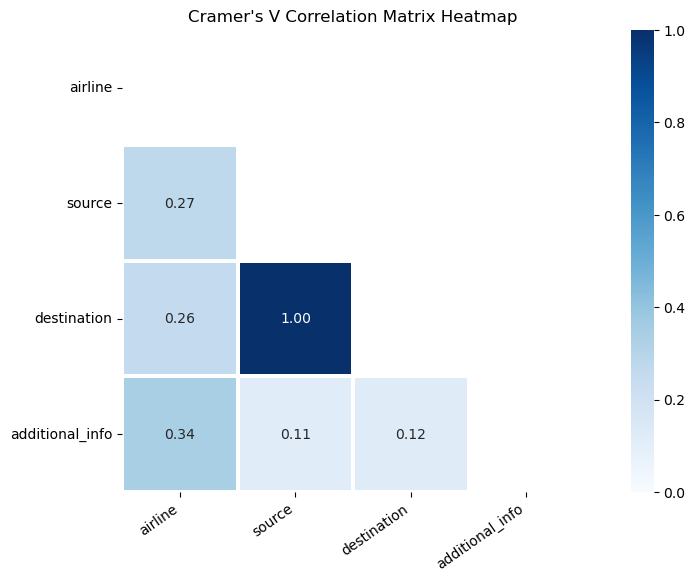

In [49]:
# categorical feature analysis

eda_helper_functions.cramersV_heatmap(train)

# 8. Detailed analysis